In [2]:
# importing pandas
import pandas as pd

# importing from sklearn library
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [4]:
# saving the csv file path to a variable and then printing it out
iris_file_path = r"C:\Users\Kunal Kumar Pant\myproject\IRIS.csv"
iris_data = pd.read_csv(iris_file_path)
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# storing the value of iris_data features in the default vairable X
iris_features = ['sepal_length','sepal_width','petal_length','petal_width']
X = iris_data[iris_features]

# Label binarizing the objects in the colum species by encoding it
from sklearn.preprocessing import LabelBinarizer

species = iris_data['species']
label_binarizer = LabelBinarizer()
species_encoded = label_binarizer.fit_transform(species)

iris_data_encoded = iris_data.drop('species',axis =1)
y_encoded = species_encoded

In [6]:
# splitting the model intro terms of training and validation data 
train_X, val_X, train_y_encoded, val_y_encoded = train_test_split(X, y_encoded, random_state = 0)

# Defining model
iris_model = DecisionTreeRegressor()

#Fitting model 
iris_model.fit(train_X, train_y_encoded)

DecisionTreeRegressor()

In [7]:
# Getting predictions
val_predictions = iris_model.predict(val_X)
print(mean_absolute_error(val_y_encoded, val_predictions))

0.017543859649122806


In [8]:
#To calculate accuracy
from sklearn.metrics import accuracy_score

predictions = iris_model.predict(train_X)
accuracy = accuracy_score(train_y_encoded, predictions)
print(f"Accuracy:{accuracy}")

Accuracy:1.0


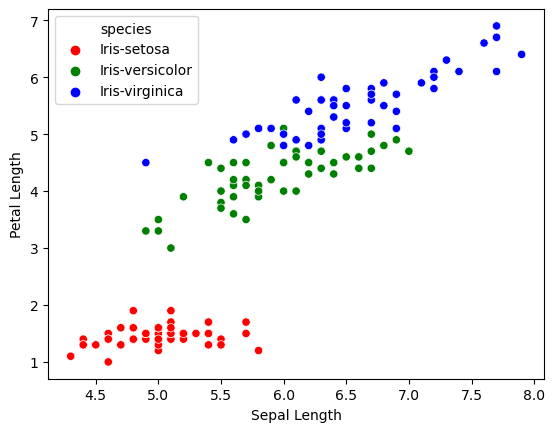

In [9]:
# Getting a scatter plot from iris_data
'''
by getting a visual representation of the data using a scatter plot,
it can be seen how different species of the iris flower showcase various 
sepal and petal lengths.
It can also be observed that within a group all the iris flowers have their
sepal and petal lengths in a fixed range only(with only a few exceptions)

'''
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the features that will be plotted
features = ['sepal_length', 'petal_length']

# Encoding object values in species column to integer
iris_data['species'] = iris_data['species'].replace({'iris_setosa': 0, 'iris_versicolor': 1, 'iris_virginica': 2})

# defining color palette
colors = ['red', 'green', 'blue']
sns.set_palette(colors)

# Creating a scatter plot
sns.scatterplot(data=iris_data, x=features[0], y=features[1], hue='species')

# Adding labels to the axes
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Saving the plot
plt.savefig('iris_scatter_plot.png')

([<matplotlib.axis.XTick at 0x25a012e3010>,
 [Text(0, 0, 'Iris-setosa'),
  Text(1, 0, 'Iris-versicolor'),
  Text(2, 0, 'Iris-virginica')])

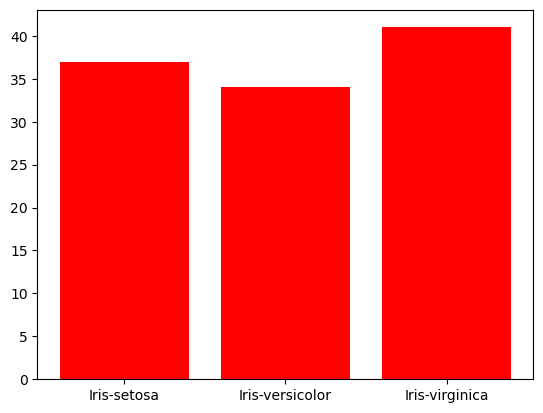

In [10]:
# Plotting a bar graph for iris_data
import numpy as np

y_pred = iris_model.predict(train_X)
class_labels = np.argmax(y_pred,axis =1)
class_counts = np.bincount(class_labels)
plt.bar(range(len(class_counts)), class_counts)

class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plt.xticks(range(len(class_counts)), class_names)

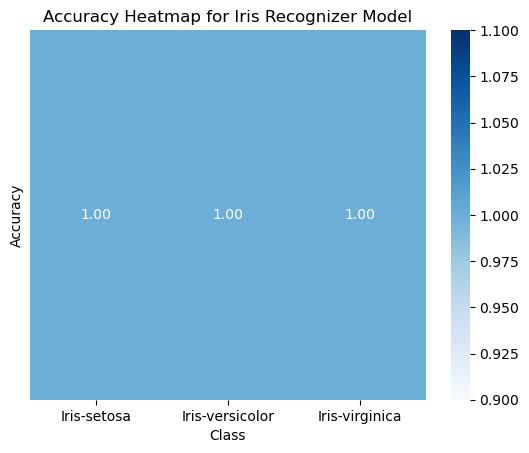

In [11]:
# Get the predicted labels from the model
y_pred = iris_model.predict(train_X)

# Converting predicted labels to class labels
class_labels = np.argmax(y_pred, axis=1)

# Converting true labels to class labels
y_true = np.argmax(train_y_encoded, axis=1)

# Calculate the accuracy for each class
accuracy_per_class = []
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for class_label in range(len(class_names)):
    mask = y_true == class_label
    accuracy = accuracy_score(y_true[mask], class_labels[mask])
    accuracy_per_class.append(accuracy)

# Creating accuracy matrix
accuracy_matrix = np.array(accuracy_per_class).reshape(1, -1)

# Creating a heatmap of the accuracy matrix
sns.heatmap(accuracy_matrix, annot=True, cmap='Blues', fmt='.2f', xticklabels=class_names, yticklabels=False)

# Setting the labels and title
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Accuracy Heatmap for Iris Recognizer Model')
plt.show()

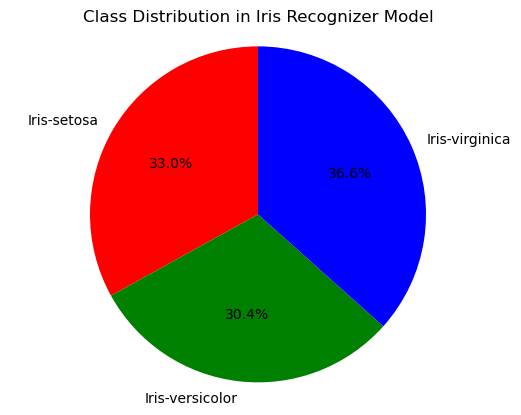

In [12]:
# Plotting a pie chart for iris_data
'''
we can find out the proportion or distribution of different categories
of the iris flower using a  pie chart 
'''
# Getting the predicted labels from the model
y_pred = iris_model.predict(train_X)

# Converting the predicted labels to class labels
class_labels = np.argmax(y_pred, axis=1)

# Counting the occurrences of each class
class_counts = np.bincount(class_labels)

# Creating a list of class labels
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Creating a pie chart
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=90)

# Setting the aspect ratio to be equal to ensure a circular pie chart
plt.axis('equal')

# Setting the title
plt.title('Class Distribution in Iris Recognizer Model')
plt.show()

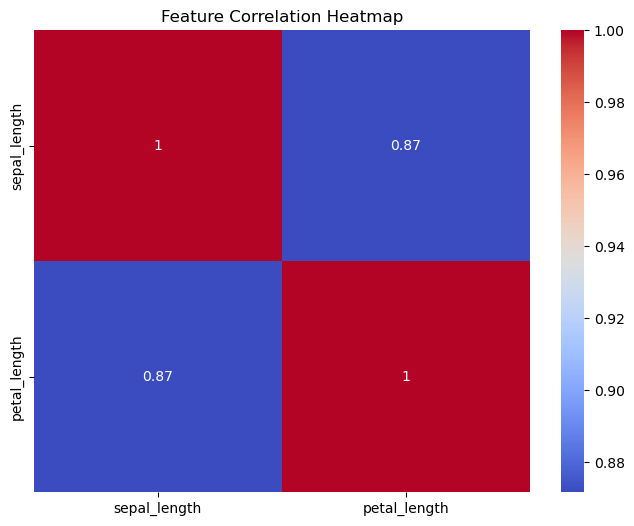

In [13]:
#Plotting a feature correlation heatmap 
'''
this helps us to knwow how much influence does each feature has on the other features
'''

iris_heatmap = pd.DataFrame(data=iris_data, columns=features)

# Computing the correlation matrix
correlation_matrix = iris_heatmap.corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Setting the title
plt.title('Feature Correlation Heatmap')

plt.show()